In [12]:
#%pip install numpy==1.22 --user
%pip install jupyter-resource-usage --user
%pip install keras
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439795 sha256=cf06bef1d79dc1553ea57ebfc528cf8f1204589ec048a91660eb8c00b275847c
  Stored in directory: c:\users\henry\appdata\local\pip\cache\wheels\05\94\dc\81042da9bced43ff430bc02043d213d9e4b210b584c39e31c1
Successfully built jax
Note: you may need to restart the kernel to use updated packages.


In [1]:
%autosave 60

Autosaving every 60 seconds


In [11]:
import os
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle

from PIL import Image

import matplotlib.pyplot as plt
import zipfile
from keras.utils import load_img
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
train_path = './data/train/'
test_path = './data/test/'

print(os.listdir(test_path))
print(os.listdir(train_path))


In [4]:
# Get Number of Images for each Emotion and Splitting
emotions = os.listdir(train_path)
len_train = {}
len_test = {}

X_train = []
y_train = []

X_test = []
y_test = []

for emotion in emotions:
    file_train = os.listdir(os.path.join(train_path, emotion))
    len_train[emotion] = len(file_train)
    for filename in file_train:
      img_path = os.path.join(train_path, emotion) + '/' + filename
      img = Image.open(img_path)
      img = img.resize((48, 48))
      img_array = np.array(img)
      img_array = img_array.reshape(-1)
      X_train.append(img_array)
      y_train.append(emotion)

for emotion in emotions:
    file_test = os.listdir(os.path.join(test_path, emotion))
    len_test[emotion] = len(file_test) 
    for filename in file_test:
      img_path = os.path.join(test_path, emotion) + '/' + filename
      img = Image.open(img_path)
      img = img.resize((48, 48))
      img_array = np.array(img)
      img_array = img_array.reshape(-1)
      X_test.append(img_array)
      y_test.append(emotion)
    
print("Train: ", len_train)
print("Test: ", len_test)

total_train = sum(len_train.values())
total_test = sum(len_test.values())

print("Total Train: ", total_train)
print("Total Test: ", total_test)

Train:  {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
Test:  {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}
Total Train:  28709
Total Test:  7178


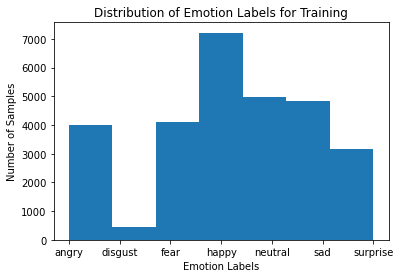

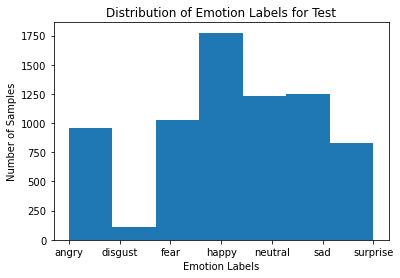

In [5]:
# Plot the distribution of the emotion labels in the dataset
plt.hist(y_train, bins=7)
plt.title('Distribution of Emotion Labels for Training')
plt.xticks(range(7), ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
plt.xlabel('Emotion Labels')
plt.ylabel('Number of Samples')
plt.show()

# Plot the distribution of the emotion labels in the dataset
plt.hist(y_test, bins=7)
plt.title('Distribution of Emotion Labels for Test')
plt.xticks(range(7), ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
plt.xlabel('Emotion Labels')
plt.ylabel('Number of Samples')
plt.show()

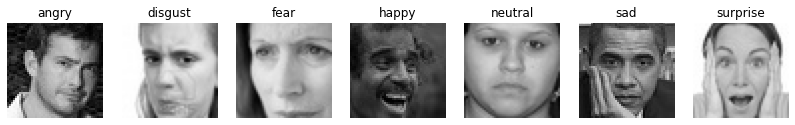

In [6]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_path):
    img = load_img((train_path + expression +'/'+ os.listdir(train_path + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [7]:
# convert the data to numpy arrays
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)

X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

# shuffling/randomizing training and testing data
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
print(X_train)
print(y_train)

[[0.25098039 0.2        0.19215686 ... 0.14509804 0.09411765 0.14901961]
 [0.56470588 0.58039216 0.59215686 ... 0.6745098  0.5372549  0.37254902]
 [0.15686275 0.18431373 0.15686275 ... 0.10588235 0.10980392 0.10588235]
 ...
 [0.5254902  0.55686275 0.6        ... 0.10588235 0.19215686 0.09803922]
 [0.25490196 0.48627451 0.46666667 ... 0.70980392 0.71764706 0.67058824]
 [0.         0.         0.         ... 0.30980392 0.31372549 0.3254902 ]]
['sad' 'sad' 'happy' ... 'fear' 'surprise' 'fear']


In [8]:
def get_accuracy(method='linear', c=1.0):
    clf = SVC(kernel=method, C=c)

    # Train the SVM classifier on the training data
    clf.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    # Print the accuracy
    print("Accuracy:", accuracy)

# Using Linear Kernel Method

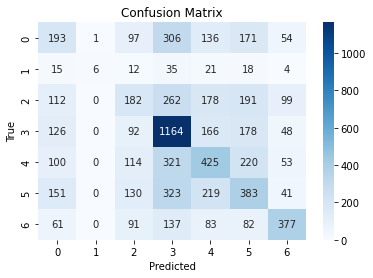

Accuracy: 0.38032878239063805


In [8]:
# Cost = 0.1
c = 0.1
get_accuracy('linear', c)

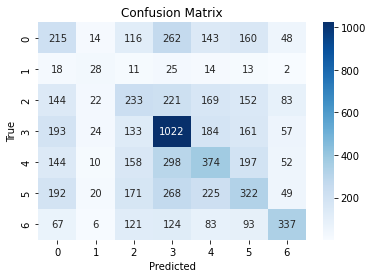

Accuracy: 0.3526051825020897


In [9]:
# Cost = 1.0
c = 1.0
get_accuracy('linear', c)

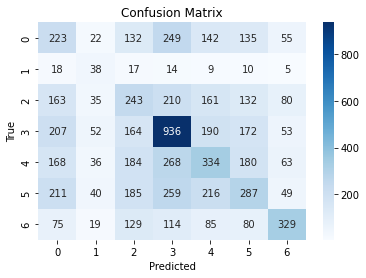

Accuracy: 0.33296182780718864


In [18]:
# Cost = 10
c = 10
get_accuracy('linear', c)

# Using Polynomial Kernel Method

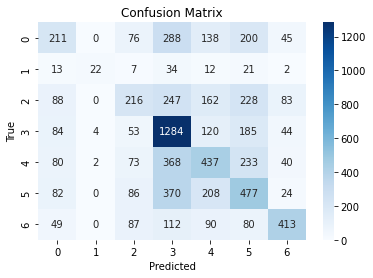

Accuracy: 0.42630259125104486


In [9]:
# Cost = 0.1
c = 0.1
get_accuracy('poly', c)

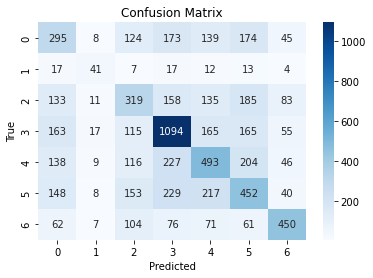

Accuracy: 0.43800501532460295


In [10]:
# Cost = 1.0
c = 1.0
get_accuracy('poly', c)

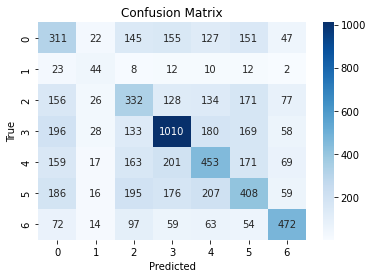

Accuracy: 0.422123154081917


In [11]:
# Cost = 10
c = 10
get_accuracy('poly', c)

# Using RBF Kernel Method

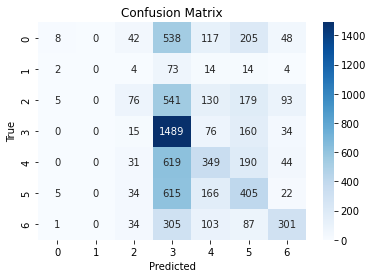

Accuracy: 0.3661186960156032


In [12]:
# Cost = 0.1
c = 0.1
get_accuracy('rbf', c)

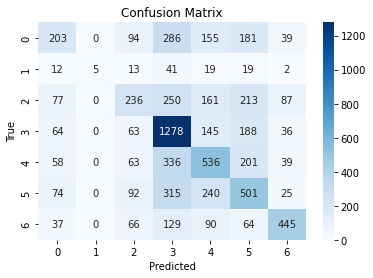

Accuracy: 0.4463638896628587


In [13]:
# Cost = 1.0
c = 1.0
get_accuracy('rbf', c)

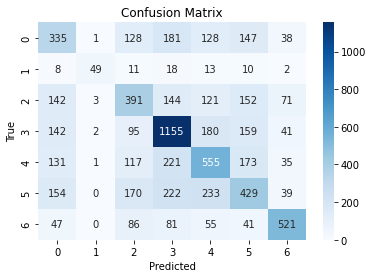

Accuracy: 0.47854555586514347


In [14]:
# Cost = 10
c = 10
get_accuracy('rbf', c)

# Using Sigmoid Kernel Method

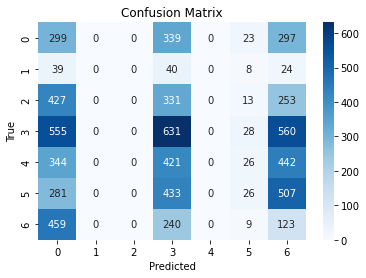

Accuracy: 0.15032042351629982


In [15]:
# Cost = 0.1
c = 0.1
get_accuracy('sigmoid', c)

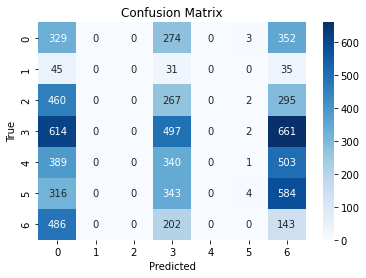

Accuracy: 0.13555307885204793


In [16]:
# Cost = 1.0
c = 1.0
get_accuracy('sigmoid', c)

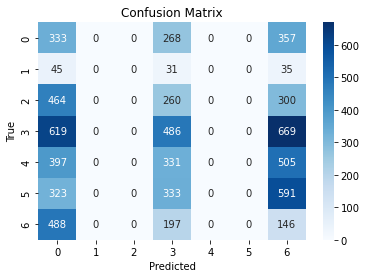

Accuracy: 0.1344385622736138


In [17]:
# Cost = 10
c = 10
get_accuracy('sigmoid', c)

# Graph of RBF: C=10.0 Accuracy of each expression

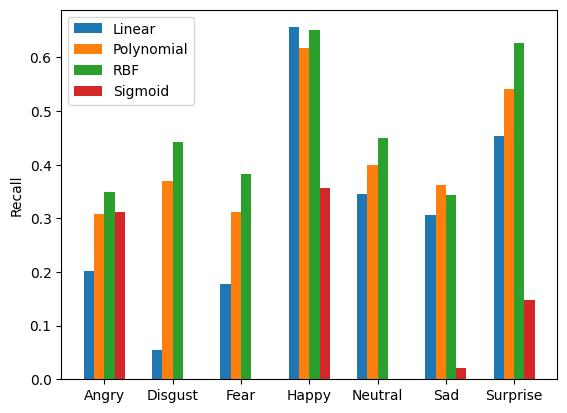

In [7]:

import matplotlib.pyplot as plt
import numpy as np
# create some example data
x = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
y1 = [193/958, 6/111, 182/1024, 1164/1774, 425/1233, 383/1247, 377/831]
y2 = [295/958, 41/111, 319/1024, 1094/1774, 493/1233, 452/1247, 450/831]
y3 = [335/958, 49/111, 391/1024, 1155/1774, 555/1233, 429/1247, 521/831]
y4 = [299/958, 0/111, 0/1024, 631/1774, 0/1233, 26/1247, 123/831]

# create a figure and axis object
fig, ax = plt.subplots()

# set the bar width
bar_width = 0.15

# plot the bar chart for each y-array
ax.bar(np.arange(len(x))-1.5*bar_width, y1, width=bar_width, label='Linear')
ax.bar(np.arange(len(x))-0.5*bar_width, y2, width=bar_width, label='Polynomial')
ax.bar(np.arange(len(x))+0.5*bar_width, y3, width=bar_width, label='RBF')
ax.bar(np.arange(len(x))+1.5*bar_width, y4, width=bar_width, label='Sigmoid')

# set the xticks and labels
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)

# set the labels and legend
ax.set_ylabel('Recall')
ax.legend()

# show the plot
plt.show()
